*** Data Wrangling process ***

> In this stage of the project I will be working on the data recieve from the twitter API. I will be converting it into a dataframe for easily manipulation.

In [1]:
#Import all the necessary libraries needed for the project

import pandas as pd 
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import re

%matplotlib inline 


In [2]:
# Creating a data frame from the data from twitter 

#Reading file line by line into dataframe 
df=[]
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        # Appending values to the list created 
        df.append({'retweet_count':retweet_count,
                  'favorite_count': favorite_count,
                  'tweet_id':tweet_id})
        
        #Creating a dataframe from the list 
        
tweet_json=pd.DataFrame(df,columns = ['tweet_id','retweet_count','favorite_count'])

****Accessing the data to ascertain what issue they may have 
> At this point of the project i will be performing both visual and programmatic accessment on the various datasets to check for issues that may hinder the progress of my analysis. 


In [3]:
#View the fisrt 30 items on the list 

tweet_json.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [4]:
# Viewing the info about the data in the file 

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [5]:
# Checking for duplicates using the unique variable (column) tweet_id

tweet_json.duplicated(subset=['tweet_id']).sum() 

0

In [6]:
# Loading data from the tsv file into a dataframe 

image_predictions=pd.read_csv('image-predictions.tsv', sep ='\t')

In [7]:
# Viewing the contents of the dataframe 

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# Viewing information about the dataframe 


image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
#Checking the shape of the dataframe 

image_predictions.shape

(2075, 12)

In [10]:
# Checking for duplicates using the unique variable (column) tweet_id

image_predictions.duplicated(subset=['tweet_id']).sum()

0

In [11]:
#Loading data from csv file into the dataframe 

twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [12]:
# Viewing the contents of the dataframe 

twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
# Viewing the info about the content of the dataframe 

twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# Checking for duplicates using the unique variable (column) tweet_id

twitter_archive_enhanced.duplicated(subset=['tweet_id']).sum()

0

## Observation from Data Assessment 

### Data Tidy Issues
> 1. Merge doggo,floofer,pupper,puppo into stage column
> 1. Since all the dataframes has a unique column tweet_id hence needs to be merged 


### Data Quality Issues
 
> 1. 'twitter_json','twitter_archive_enhanced','image_predictions', table: tweet_id, timestamp have wrong data types
> 2. 'image_predictions' table: p column has names with starting with small letters
> 3. 'image_predictions' table: img_num, p_conf,p  is supposed to be image_number, prediction_confidence, prediction,  
> 4. 'twitter_archive_enhanced' table: denominator column have "10" instead of 10
> 5. 'twitter_archive_enhanced' table:'twitter_archive_enhanced' table:HTML tags from source column not making it more readable.
> 6. 'twitter_archive_enhanced' table:Invalid dog names like a, such, getting
> 7. 'twitter_archive_enhanced' table:Retweet-related rows and columns needs to be removed.
> 8. 'twitter_archive_enhanced' table:None in doggo, floofer, pupper, puppo columns is treated as a non-null value. 



#### At this stage of the project I will performing data cleaning based on the issues raised in the assessment stage

> 1. Change tweet _id datatype from int to string and timestamp into datetime datatype 

In [15]:
# Create copies of each of the tables 

twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

In [16]:
# code to change tweet_id column in the tweet_json table to string 

tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

In [17]:
# Test code 
type(tweet_json_clean['tweet_id'][0])


str

In [18]:
# Test code 
type(twitter_archive_enhanced_clean['tweet_id'][0])


str

In [19]:
#Test Code
type(image_predictions_clean['tweet_id'][0])


str

In [20]:
#Test Code 

type(twitter_archive_enhanced_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

> 2. Change the starting with small letters to uppercase

In [21]:
# code to change the starting letters of names in the p_column into capital letters

image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()

In [22]:
# Test Case 

image_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


> 3. Change the following img_num, p_conf,p, p_dog to be image_number, prediction_confidence, prediction, prediction_dog

In [23]:
# Code to change column name p_conf to p_confidence in the image_predictions table using pandas rename function 

image_predictions_clean.rename(columns={'p1': 'prediction1'}, inplace=True)
image_predictions_clean.rename(columns={'p2': 'prediction2'}, inplace=True)
image_predictions_clean.rename(columns={'p3': 'prediction3'}, inplace=True)

image_predictions_clean.rename(columns={'p1_conf': 'prediction1_confidence'}, inplace=True)
image_predictions_clean.rename(columns={'p2_conf': 'prediction2_confidence'}, inplace=True)
image_predictions_clean.rename(columns={'p3_conf': 'prediction3_confidence'}, inplace=True)

image_predictions_clean.rename(columns={'p1_dog': 'prediction1_dog'}, inplace=True)
image_predictions_clean.rename(columns={'p2_dog': 'prediction2_dog'}, inplace=True)
image_predictions_clean.rename(columns={'p3_dog': 'prediction3_dog'}, inplace=True)

image_predictions_clean.rename(columns={'img_num': 'image_number'}, inplace=True)


In [24]:
# Test Code 
image_predictions_clean

,tweet_id,jpg_url,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


> 4. Changing denominator column from "10" to 10

In [25]:
#Code to change hange denominator column values with "10" to 10

twitter_archive_enhanced_clean.rating_denominator = twitter_archive_enhanced_clean.rating_denominator.replace( range(0,1000) , 10 )  

In [26]:
# Test Code 

twitter_archive_enhanced_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

> 5. Remove retweet related rows and columns since it is not relevante to the analysis



In [27]:
# Removing retweet rows with "RT @"

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.text.str.contains("RT @")]

In [35]:
# Test Code 

twitter_archive_enhanced_clean.text.head(20)

0     This is Phineas. He's a mystical boy. Only eve...
1     This is Tilly. She's just checking pup on you....
2     This is Archie. He is a rare Norwegian Pouncin...
3     This is Darla. She commenced a snooze mid meal...
4     This is Franklin. He would like you to stop ca...
5     Here we have a majestic great white breaching ...
6     Meet Jax. He enjoys ice cream so much he gets ...
7     When you watch your owner call another dog a g...
8     This is Zoey. She doesn't want to be one of th...
9     This is Cassie. She is a college pup. Studying...
10    This is Koda. He is a South Australian decksha...
11    This is Bruno. He is a service shark. Only get...
12    Here's a puppo that seems to be on the fence a...
13    This is Ted. He does his best. Sometimes that'...
14    This is Stuart. He's sporting his favorite fan...
15    This is Oliver. You're witnessing one of his m...
16    This is Jim. He found a fren. Taught him how t...
17    This is Zeke. He has a new stick. Very pro

In [34]:
# Test Code 2

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['text'].isin(['RT @'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
# Removing retweet related columns together with other unwanted columns 

twitter_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp'], axis=1, inplace=True)

In [37]:
#Test Code

twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


> 6. Converting none in the following columns doggo, floofer, pupper, as null values


In [38]:
# First replace None in stage columns with empty string as follows.
twitter_archive_enhanced_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_enhanced_clean.floofer.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.pupper.replace('None', '', inplace=True)
twitter_archive_enhanced_clean.puppo.replace ('None', '', inplace=True)

> 7. Removing html tags from source column 

In [39]:
# Remove html tag from tag to reveal actual source. 

twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].str.replace(r'<[^<>]*>', '', regex=True)

In [40]:
#Test Code 

twitter_archive_enhanced_clean.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2175, dtype: object

> 8. Removing invalid dog names (lowercase names)

In [41]:
# Removing invalid dog names from table

twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['name'].str[0].str.islower()]

In [42]:
#Code Check

twitter_archive_enhanced_clean['name'].str.islower().all()

False

In [43]:
twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,,,,
2343,666073100786774016,2015-11-16 01:59:36+00:00,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,None,,,,
2344,666071193221509120,2015-11-16 01:52:02+00:00,Twitter for iPhone,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,None,,,,
2351,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,,


# Tidy Issues 

>1. Merging dog stages together 

In [44]:
#Merging the columns together 

twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo

C:\Users\alaha\AppData\Local\Temp\ipykernel_4012\2728937962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean['stage'] = twitter_archive_enhanced_clean.doggo + twitter_archive_enhanced_clean.floofer + twitter_archive_enhanced_clean.pupper + twitter_archive_enhanced_clean.puppo


In [45]:
# Formating entries with multiple dog stages which appeared like doggopupper, doggopuppo, doggofloofer

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [38]:
# Deleting doggo,floofer,pupper, puppo columns

twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

C:\Users\alaha\AppData\Local\Temp\ipykernel_13660\3259407387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)


In [46]:
# test Code 

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['stage'].isin(['doggo', 'floofer', 'puppo','pupper'])].head(40)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo
12,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,,,,puppo,puppo
14,889531135344209921,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,,,,puppo,puppo
29,886366144734445568,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,,,pupper,,pupper
43,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,,,,doggo
46,883360690899218434,2017-07-07 16:22:55+00:00,Twitter for iPhone,Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,,floofer,,,floofer
49,882762694511734784,2017-07-06 00:46:41+00:00,Twitter for iPhone,This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,,,pupper,,pupper
71,878776093423087618,2017-06-25 00:45:22+00:00,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,,,,puppo,puppo
82,876838120628539392,2017-06-19 16:24:33+00:00,Twitter for iPhone,This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,,,pupper,,pupper
92,874296783580663808,2017-06-12 16:06:11+00:00,Twitter for iPhone,This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,,,pupper,,pupper


> 2. Merging all the three dataframes together 
>

In [47]:
#Merge the 3 dataframes together 

merge1 = pd.merge(twitter_archive_enhanced_clean, tweet_json_clean, how="left", on="tweet_id")
merge1 = pd.merge(merge1, image_predictions_clean, how="left", on="tweet_id")

In [48]:
#Test code 

merge1

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,1.0,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,2.0,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,666082916733198337,2015-11-16 02:38:37+00:00,Twitter for iPhone,Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6,10,None,,,...,1.0,Pug,0.489814,True,Bull_Mastiff,0.404722,True,French_Bulldog,0.048960,True
2067,666073100786774016,2015-11-16 01:59:36+00:00,Twitter for iPhone,Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,10,None,,,...,1.0,Walker_Hound,0.260857,True,English_Foxhound,0.175382,True,Ibizan_Hound,0.097471,True
2068,666071193221509120,2015-11-16 01:52:02+00:00,Twitter for iPhone,Here we have a northern speckled Rhododendron....,https://twitter.com/dog_rates/status/666071193...,9,10,None,,,...,1.0,Gordon_Setter,0.503672,True,Yorkshire_Terrier,0.174201,True,Pekinese,0.109454,True
2069,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,...,1.0,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
# Checking the shape of the merged data

merge1.shape

(2071, 26)

In [50]:
# Storing Data in a csv format 

merge1.to_csv('twitter_archive_master.csv',  index=False)

*** Analysis and Visualisation 

At this stage of the process I will analysing and using diagrams to display the outcome of the analysis 



In [51]:
# Loading data into a dataframe for analysis 

df = pd.read_csv('twitter_archive_master.csv')

In [52]:
# Viewing the contents of the dataframe 

df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,image_number,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,...,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,...,1.0,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,...,2.0,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [53]:
# Cheching information about the contents of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2071 non-null   int64  
 1   timestamp               2071 non-null   object 
 2   source                  2071 non-null   object 
 3   text                    2071 non-null   object 
 4   expanded_urls           2013 non-null   object 
 5   rating_numerator        2071 non-null   int64  
 6   rating_denominator      2071 non-null   int64  
 7   name                    2071 non-null   object 
 8   doggo                   84 non-null     object 
 9   floofer                 10 non-null     object 
 10  pupper                  222 non-null    object 
 11  puppo                   25 non-null     object 
 12  stage                   330 non-null    object 
 13  retweet_count           2071 non-null   int64  
 14  favorite_count          2071 non-null   

In [72]:
# Arranging the data according to ascending order to display the top 9

most_liked_tweets=df.sort_values(by=['favorite_count'],ascending=False)[['favorite_count', 'text','prediction1','prediction2','prediction3']].head(9)

# Arranging the data according to ascending order to display the last 9 

least_liked_tweets=df.sort_values(by=['favorite_count'],ascending=False)[['favorite_count', 'text','prediction1','prediction2','prediction3']].tail(9)

# Arranging the data according to ascending order to display the last 9 
most_retweets=df.sort_values(by=['retweet_count'],ascending=False)[['retweet_count', 'text','prediction1','prediction2','prediction3']].head(9)

In [68]:
# to help dispaly the full text 
pd.set_option("display.max_colwidth", -1)


# Display 

most_liked_tweets


C:\Users\alaha\AppData\Local\Temp\ipykernel_4012\484341716.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,favorite_count,text,prediction1,prediction2,prediction3
342,132810,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,Lakeland_Terrier,Labrador_Retriever,Irish_Terrier
842,131075,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,Labrador_Retriever,Ice_Bear,Whippet
61,107956,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,English_Springer,Boston_Bull,Cardigan
439,107015,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Chihuahua,Pomeranian,Toy_Terrier
117,106827,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",French_Bulldog,Boston_Bull,Pug
368,95450,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Standard_Poodle,Toy_Poodle,Tibetan_Terrier
101,85011,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,Golden_Retriever,Great_Pyrenees,Labrador_Retriever
441,75639,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",Arabian_Camel,House_Finch,Cocker_Spaniel
877,75163,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,Eskimo_Dog,Siberian_Husky,Malamute


In [69]:
# to help dispaly the full text 
pd.set_option("display.max_colwidth", -1)


# Display 

least_liked_tweets


C:\Users\alaha\AppData\Local\Temp\ipykernel_4012\3545748978.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,favorite_count,text,prediction1,prediction2,prediction3
28,117,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN
878,115,@mount_alex3 13/10,NaN,NaN,NaN
2069,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,Miniature_Pinscher,Rottweiler,Doberman
2061,108,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,Desktop_Computer,Desk,Bookcase
2048,107,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,Curly-Coated_Retriever,Giant_Schnauzer,Labrador_Retriever
2030,88,After much debate this dog is being upgraded to 10/10. I repeat 10/10,NaN,NaN,NaN
2063,81,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,English_Setter,Newfoundland,Borzoi
282,72,@docmisterio account started on 11/15/15,NaN,NaN,NaN
1083,52,@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's 12/10 rating :),NaN,NaN,NaN


In [73]:
# to help dispaly the full text 
pd.set_option("display.max_colwidth", -1)


# Display 

most_retweets


C:\Users\alaha\AppData\Local\Temp\ipykernel_4012\1512293157.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,retweet_count,text,prediction1,prediction2,prediction3
842,79515,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,Labrador_Retriever,Ice_Bear,Whippet
439,56625,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Chihuahua,Pomeranian,Toy_Terrier
877,52360,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,Eskimo_Dog,Siberian_Husky,Malamute
342,48265,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,Lakeland_Terrier,Labrador_Retriever,Irish_Terrier
61,45849,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,English_Springer,Boston_Bull,Cardigan
368,42228,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Standard_Poodle,Toy_Poodle,Tibetan_Terrier
441,37911,"""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",Arabian_Camel,House_Finch,Cocker_Spaniel
694,33421,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,Gondola,Sea_Lion,Pool_Table
117,32883,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",French_Bulldog,Boston_Bull,Pug


# Insights From The Data 

>1.	The post "Here's a super supportive puppo participating in the Toronto #WomensMarch today" had the most likes 
>2.	The least liked post was '@serial @MrRoles OH MY GOD I listened to all of season 1 during a single road trip. I love you guys! I can confirm Bernie's' had eight zero counts.
>3.	The post "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)" Had the most retweets 


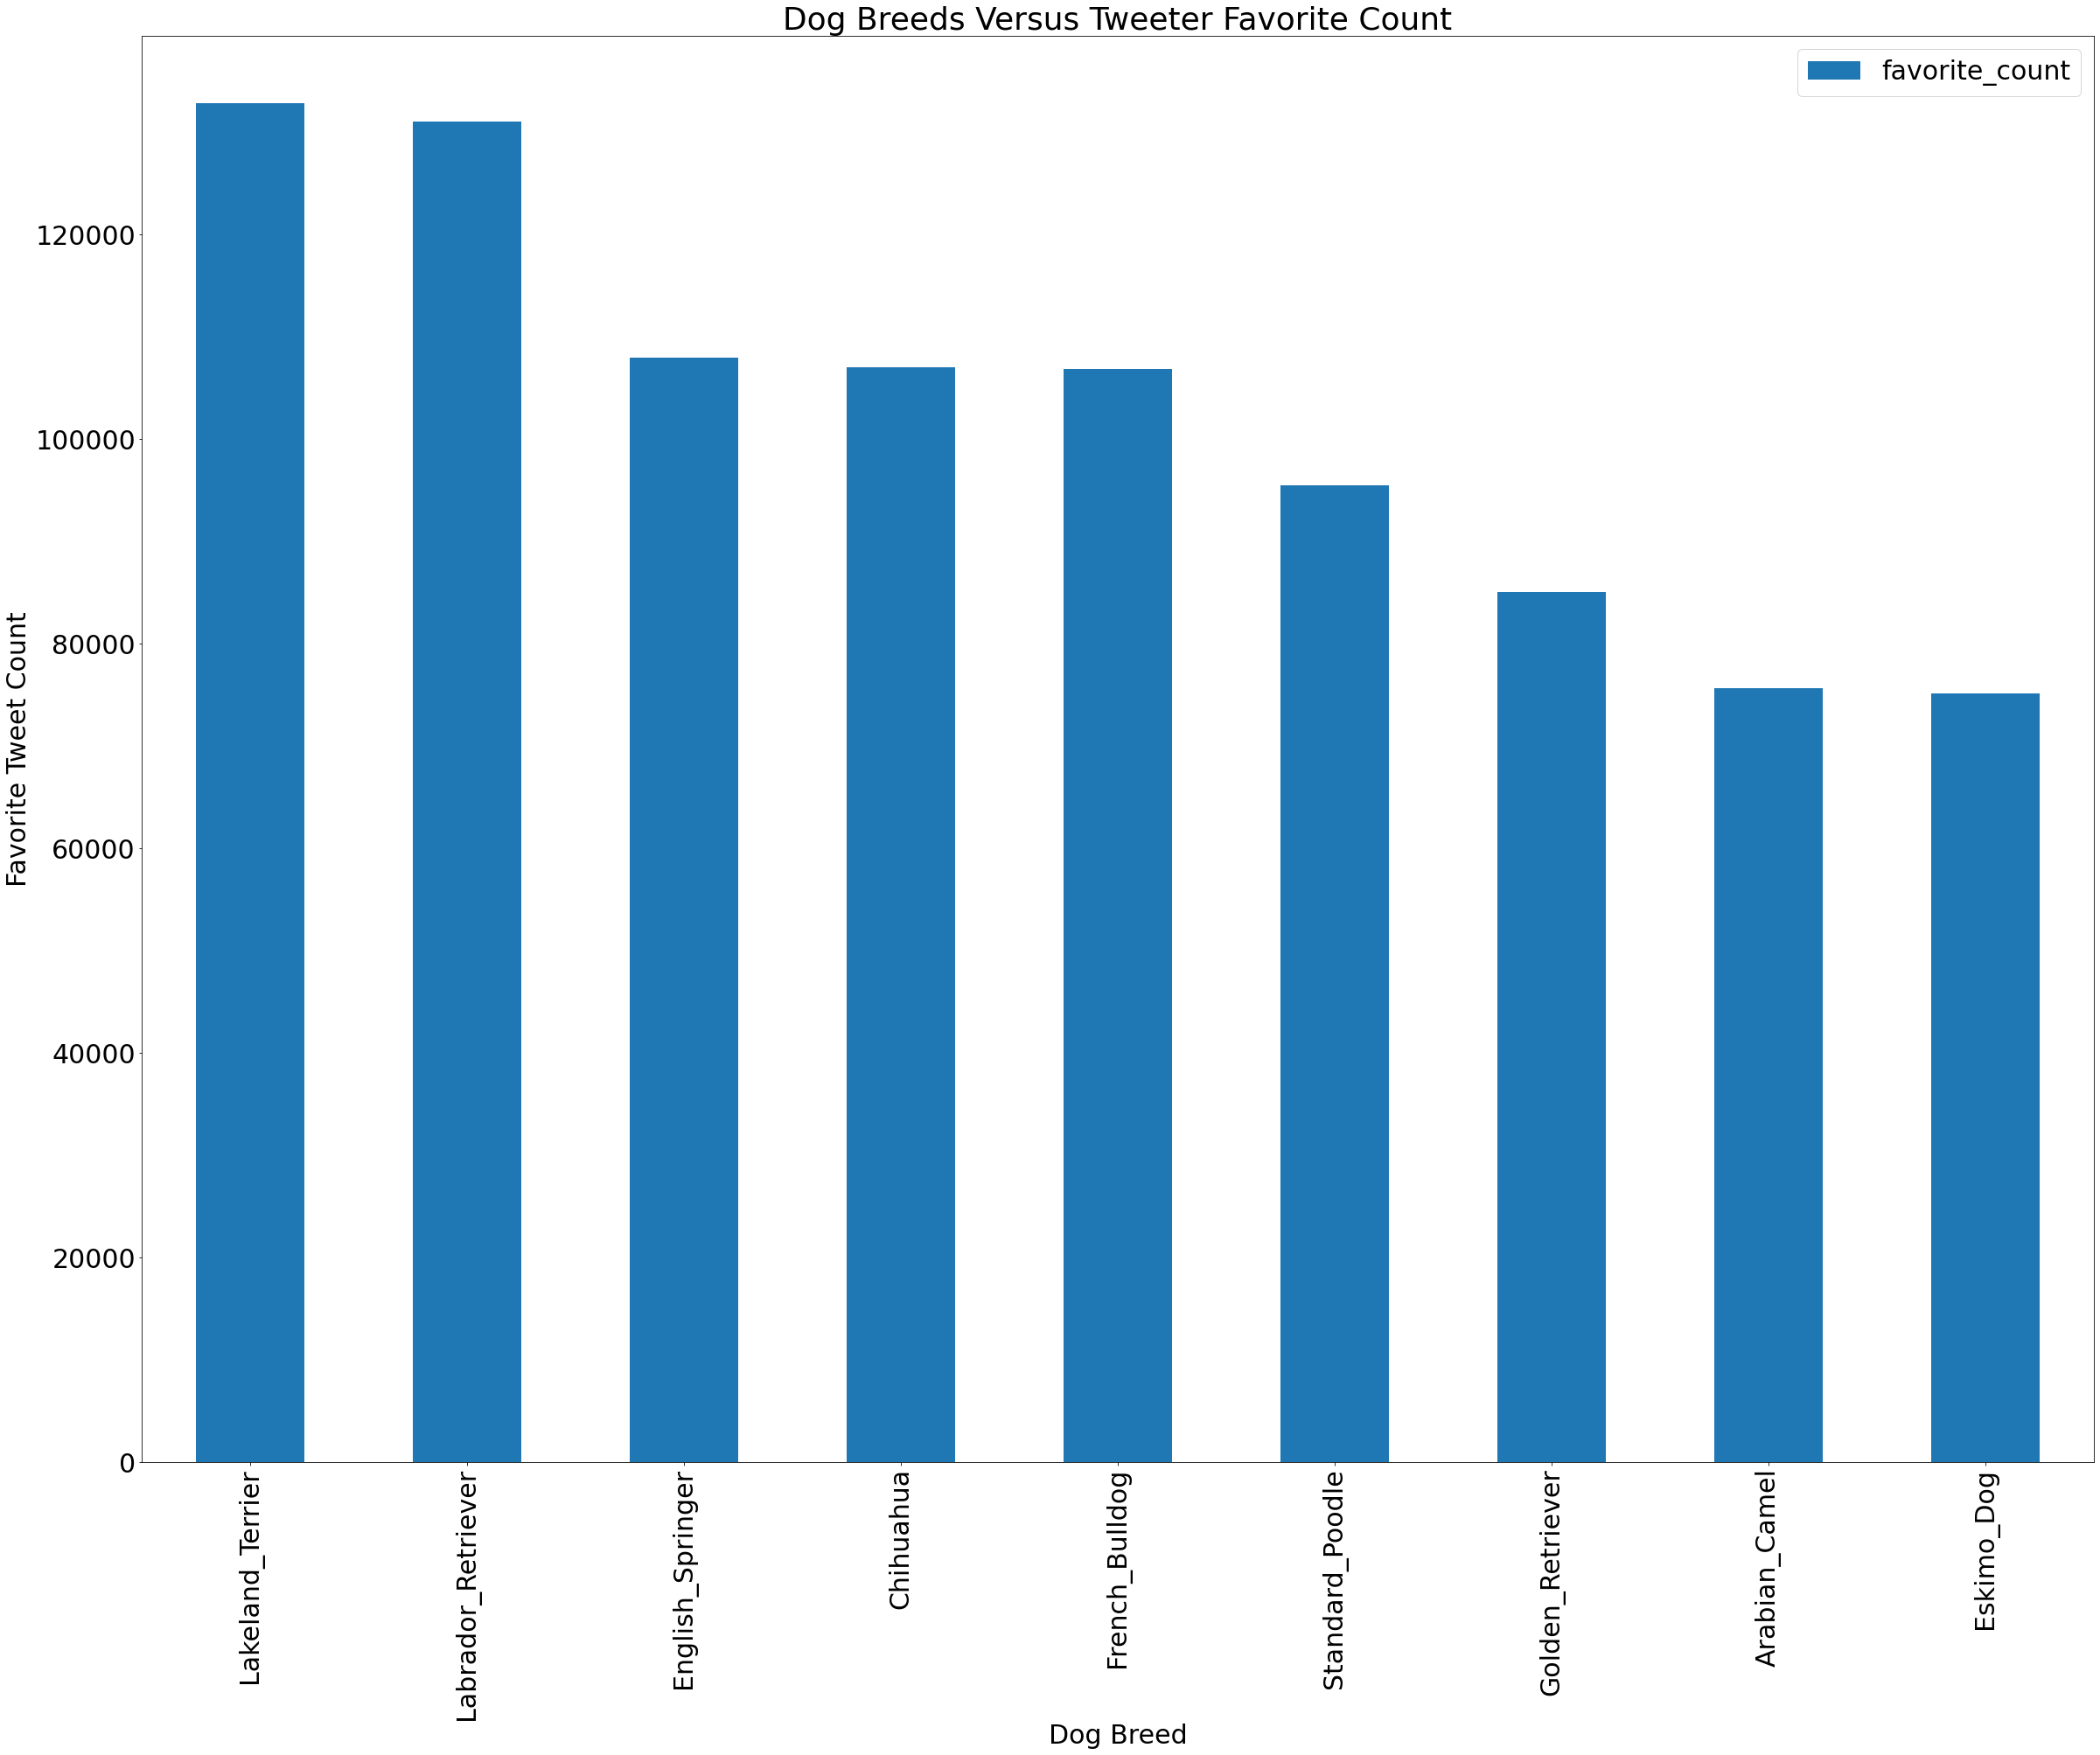

In [58]:
# Plotting the top ten posts based on retweet_count 

most_liked_tweets.plot.bar(x='prediction1', y='favorite_count', rot=0, xlabel = 'Dog Breed', ylabel='Favorite Tweet Count', title = 'Dog Breeds Versus Tweeter Favorite Count')
def customize(): 
    plt.rcParams["figure.figsize"] = (40, 30)
    plt.rcParams.update({'font.size': 30})
    plt.xticks(rotation=90)
    plt.show()
    return
customize()

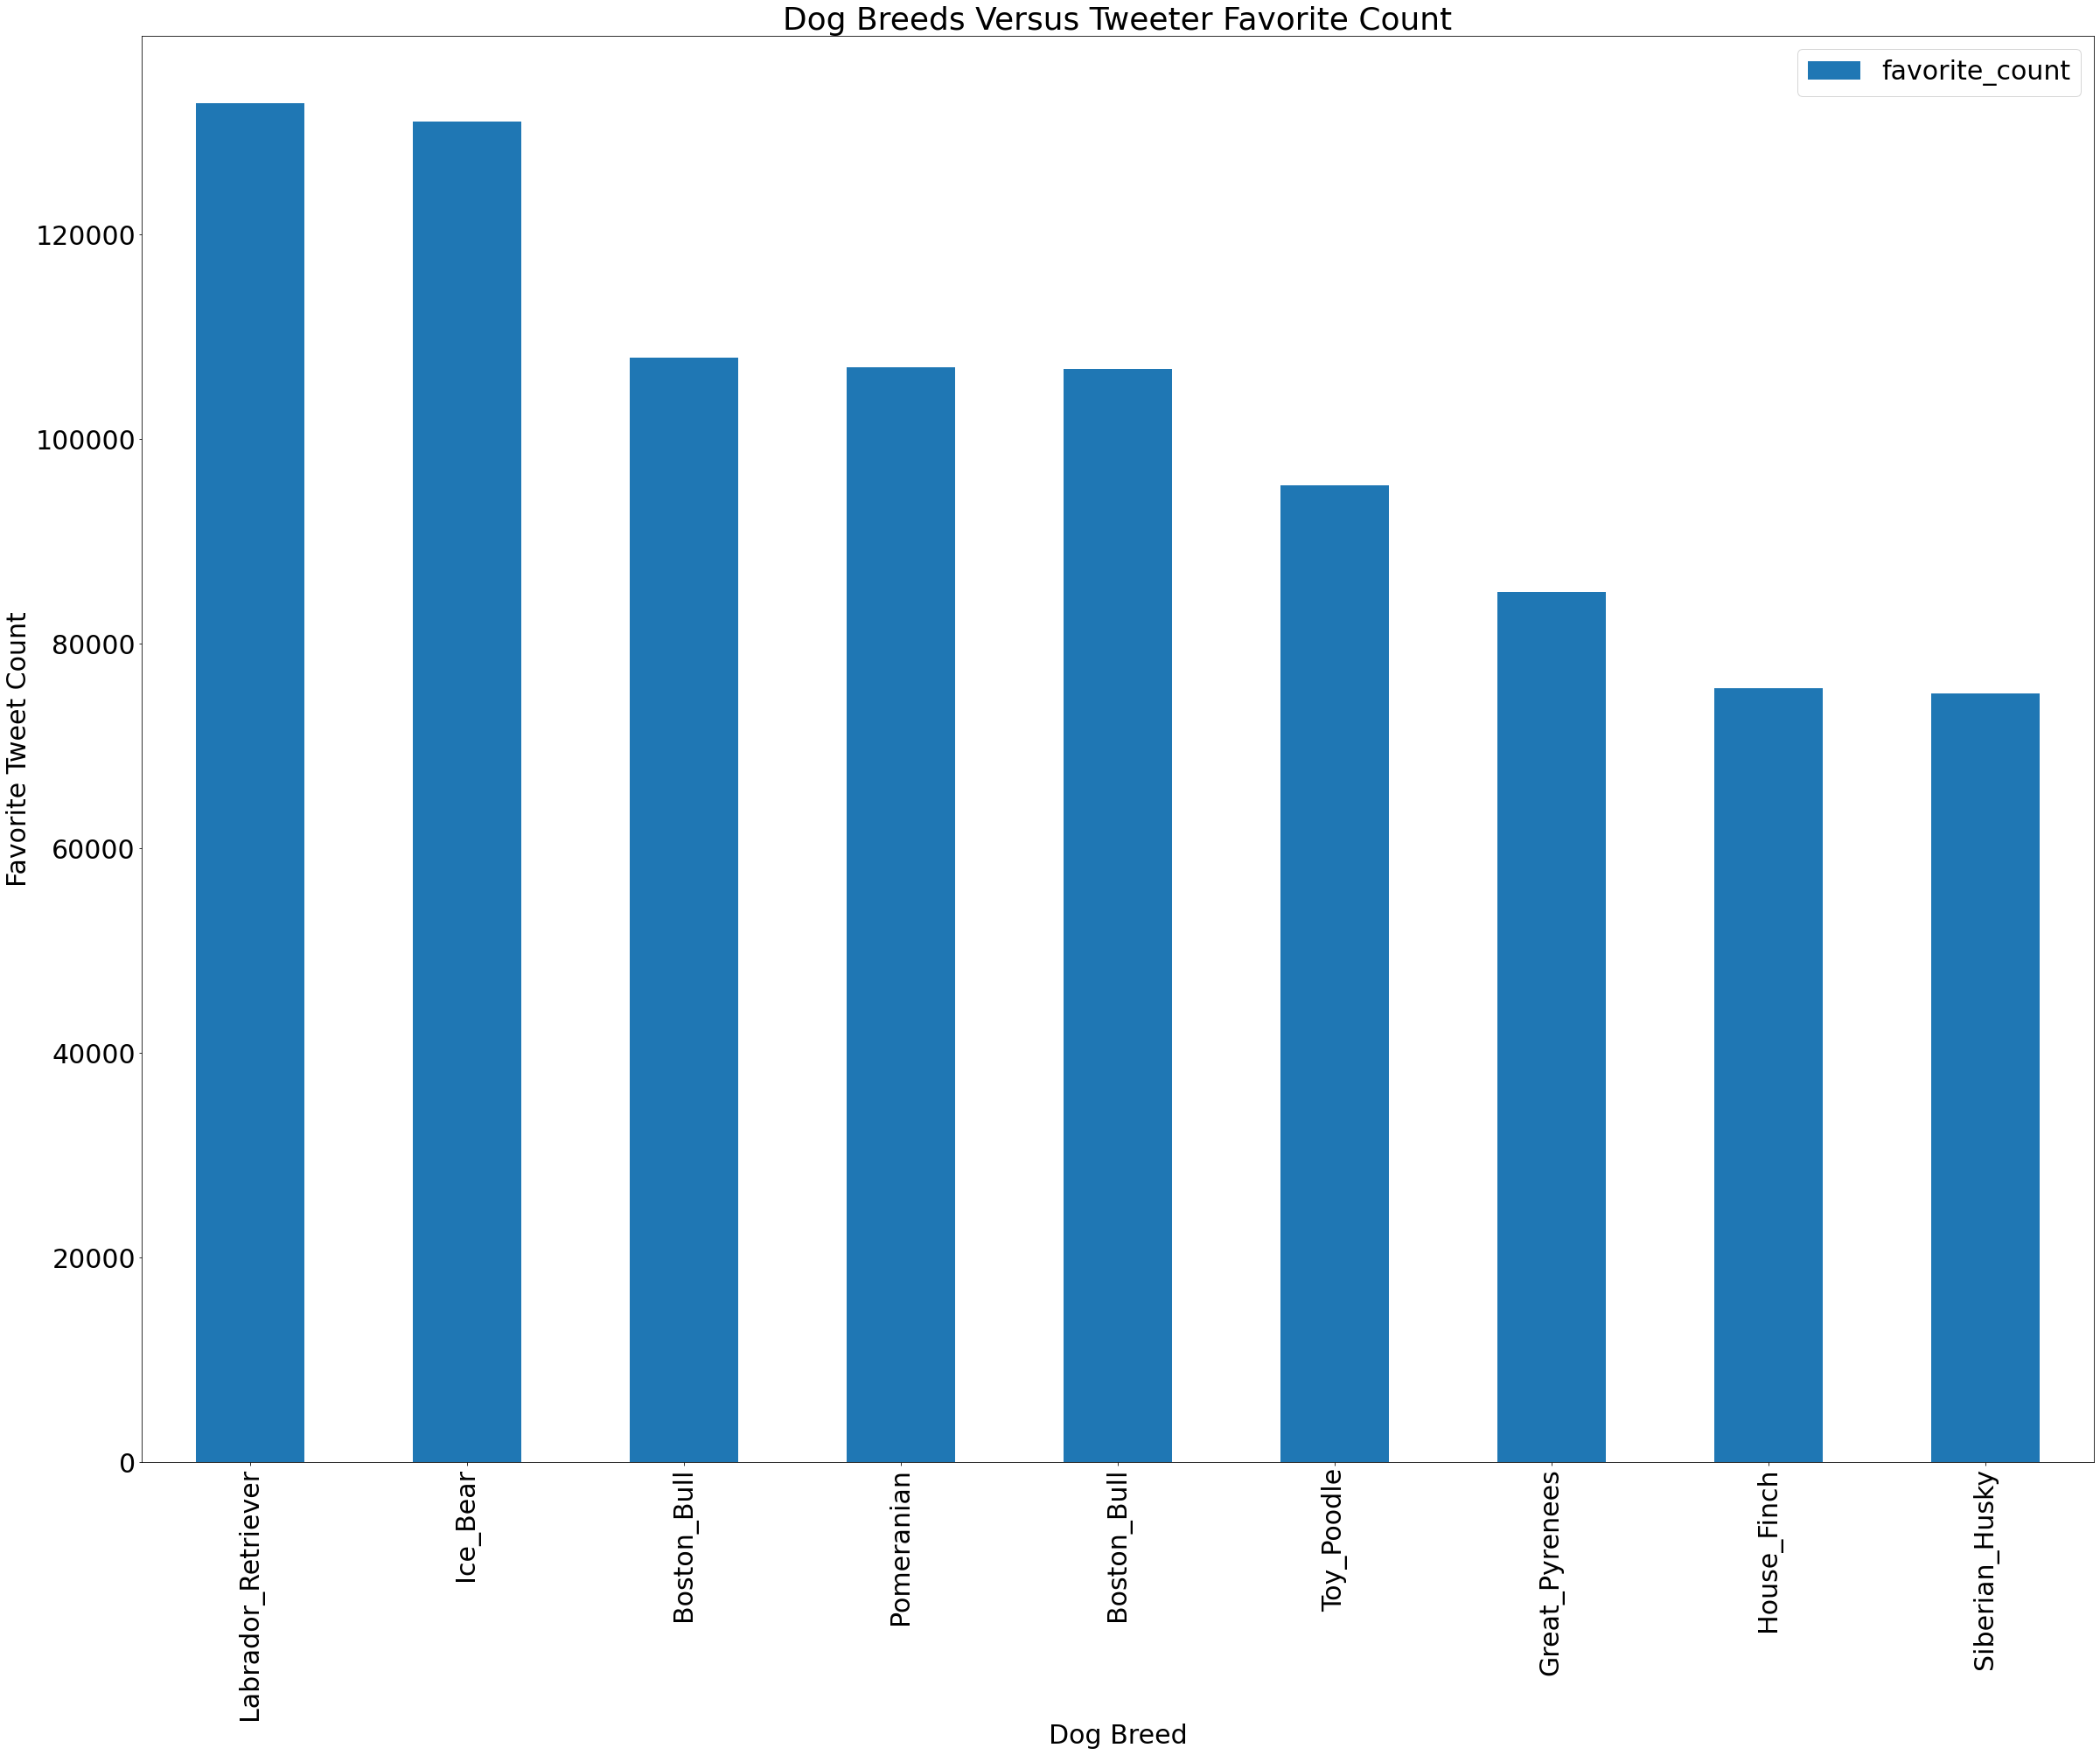

In [59]:
most_liked_tweets.plot.bar(x='prediction2', y='favorite_count', rot=0, xlabel = 'Dog Breed', ylabel='Favorite Tweet Count', title = 'Dog Breeds Versus Tweeter Favorite Count')

customize()

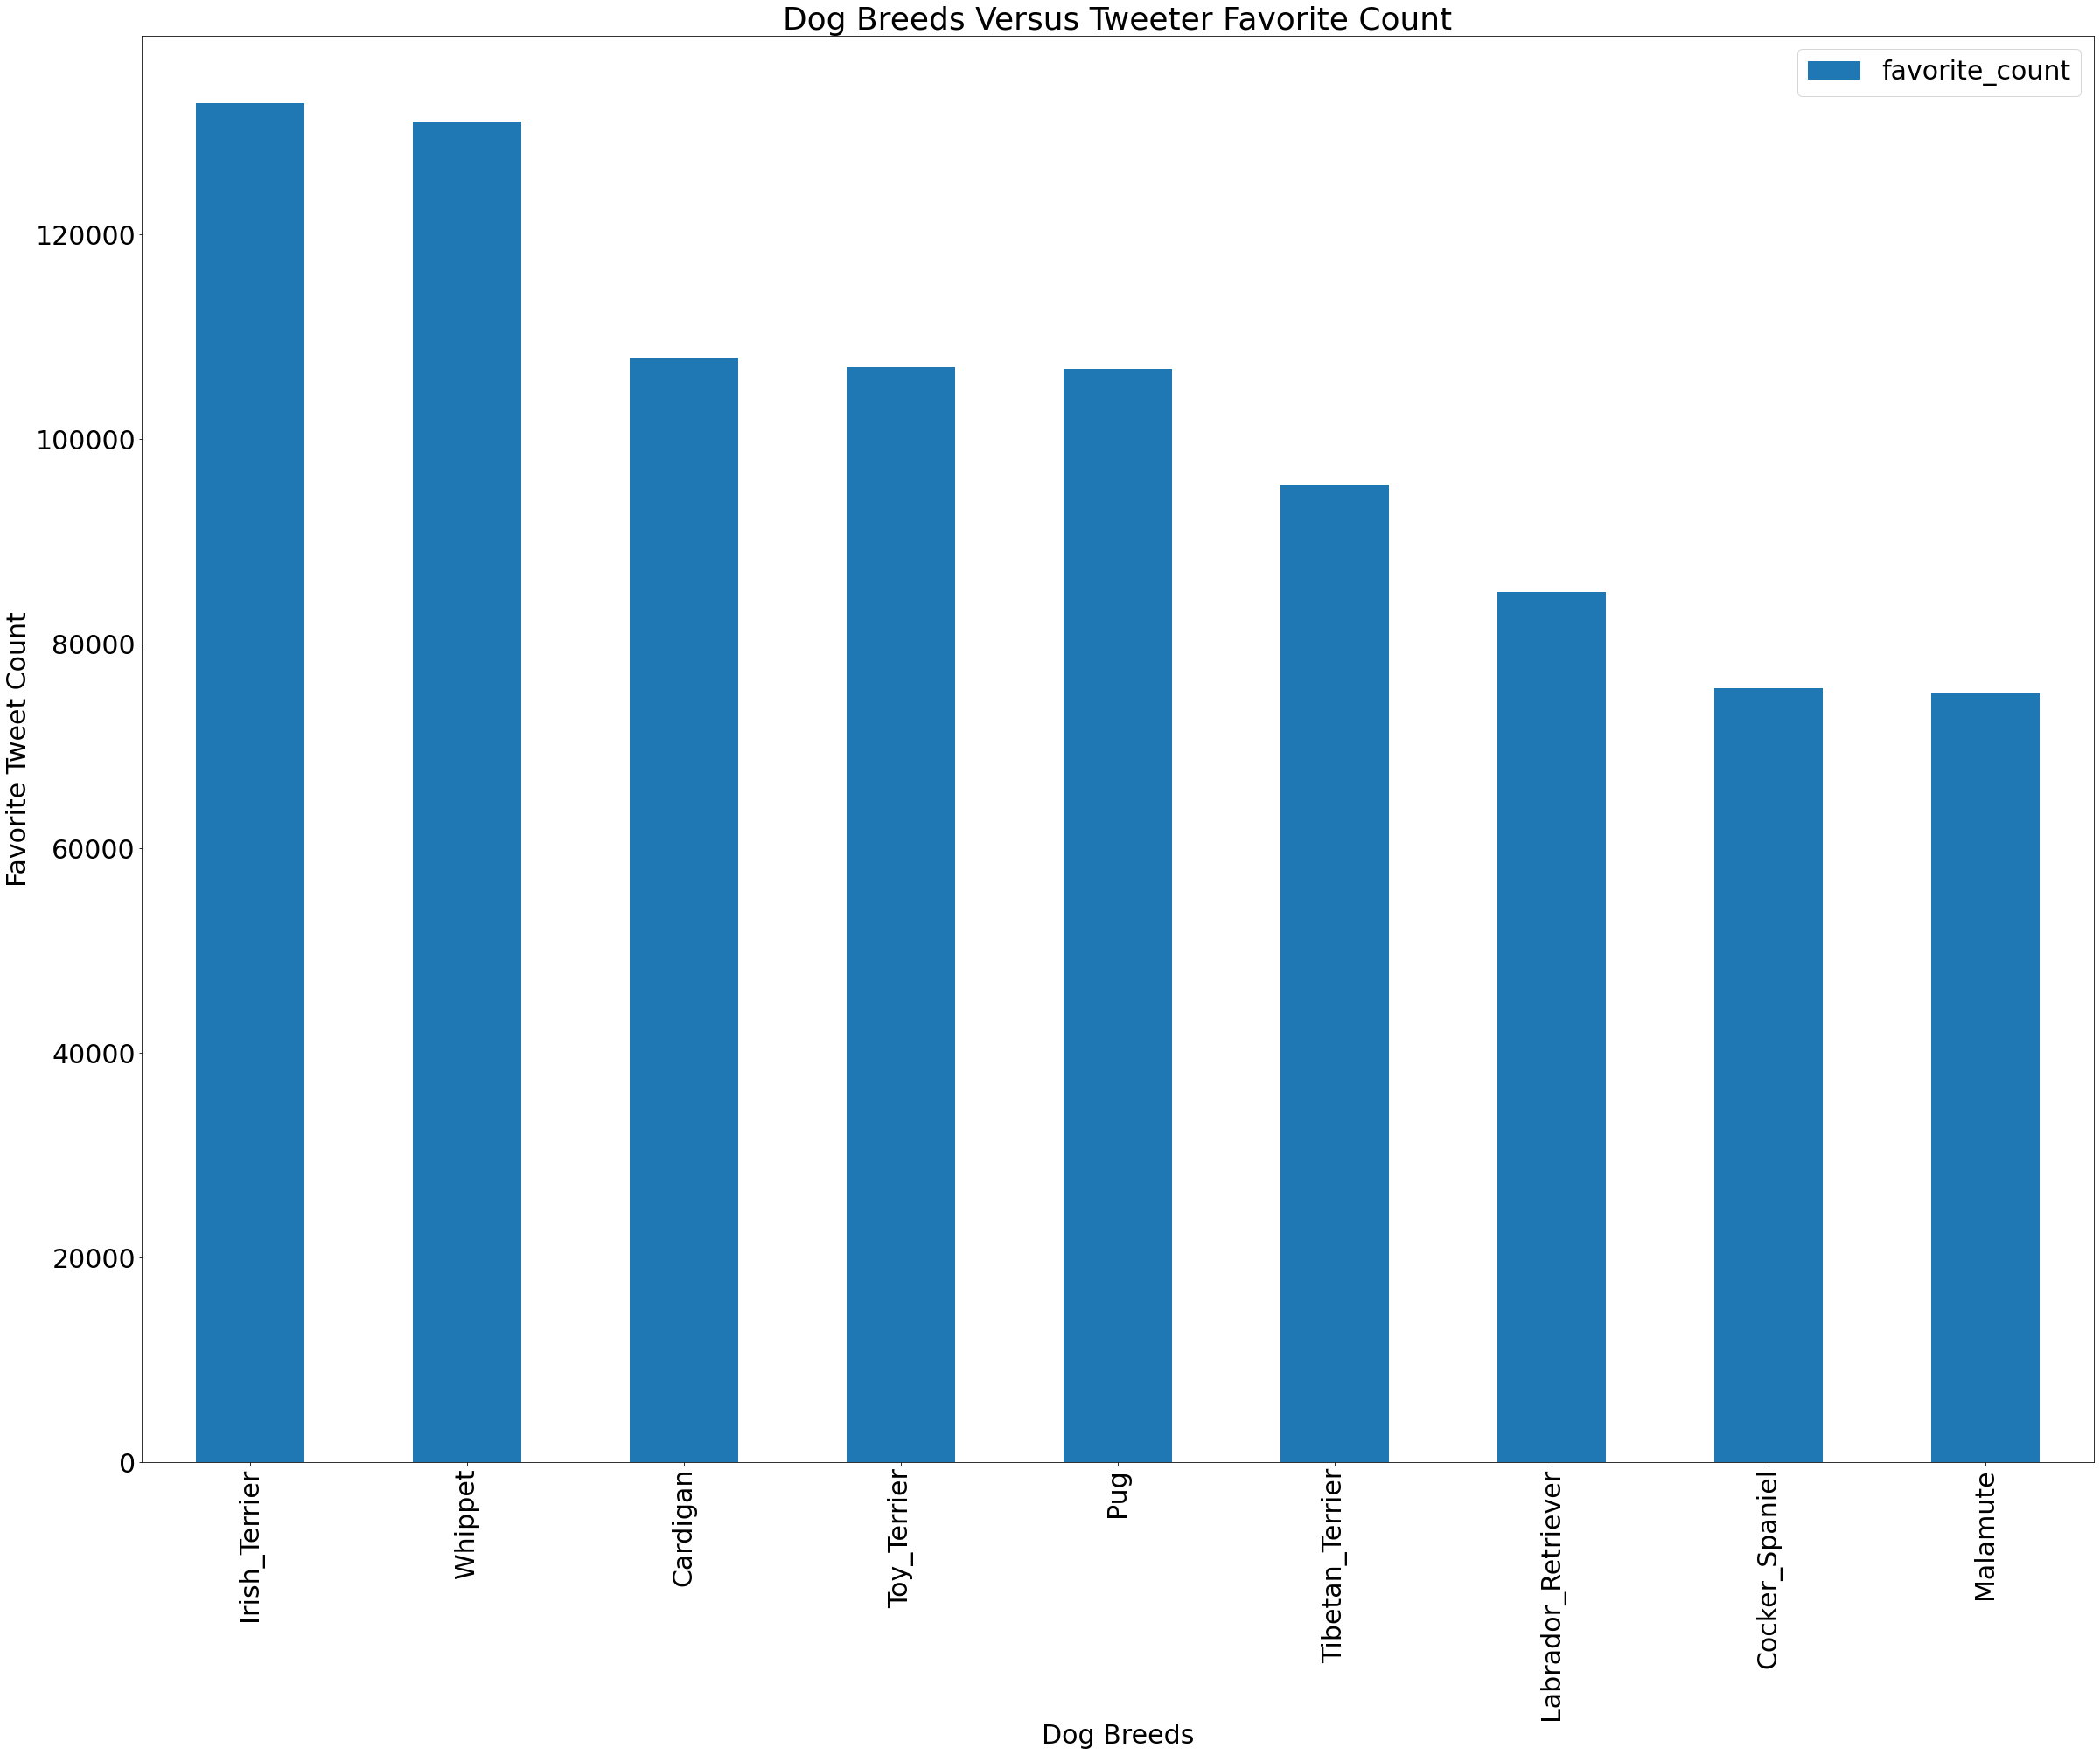

In [60]:
most_liked_tweets.plot.bar(x='prediction3', y='favorite_count', rot=0, xlabel = 'Dog Breeds', ylabel='Favorite Tweet Count', title = 'Dog Breeds Versus Tweeter Favorite Count')

customize()

# Bar Chart Analysis 

> From the above visuals, dog breeds from each prediction were plotted against a favorite number of tweets. It was evident in the graph that some dog breeds from each prediction, that is dog breeds Lakeland Terrier,Laborer_retriever, Irish_Terrier from prediction1,prediction2,prediction3 respectively hade the most like. This essentially means that these breeds of dogs were popular.

In [61]:
p1_success_ptg = ((df['prediction1_dog'].value_counts()[True])/(df['prediction1_dog'].count()))*100
p2_success_ptg = ((df['prediction2_dog'].value_counts()[True])/(df['prediction2_dog'].count()))*100
p3_success_ptg = ((df['prediction3_dog'].value_counts()[True])/(df['prediction3_dog'].count()))*100

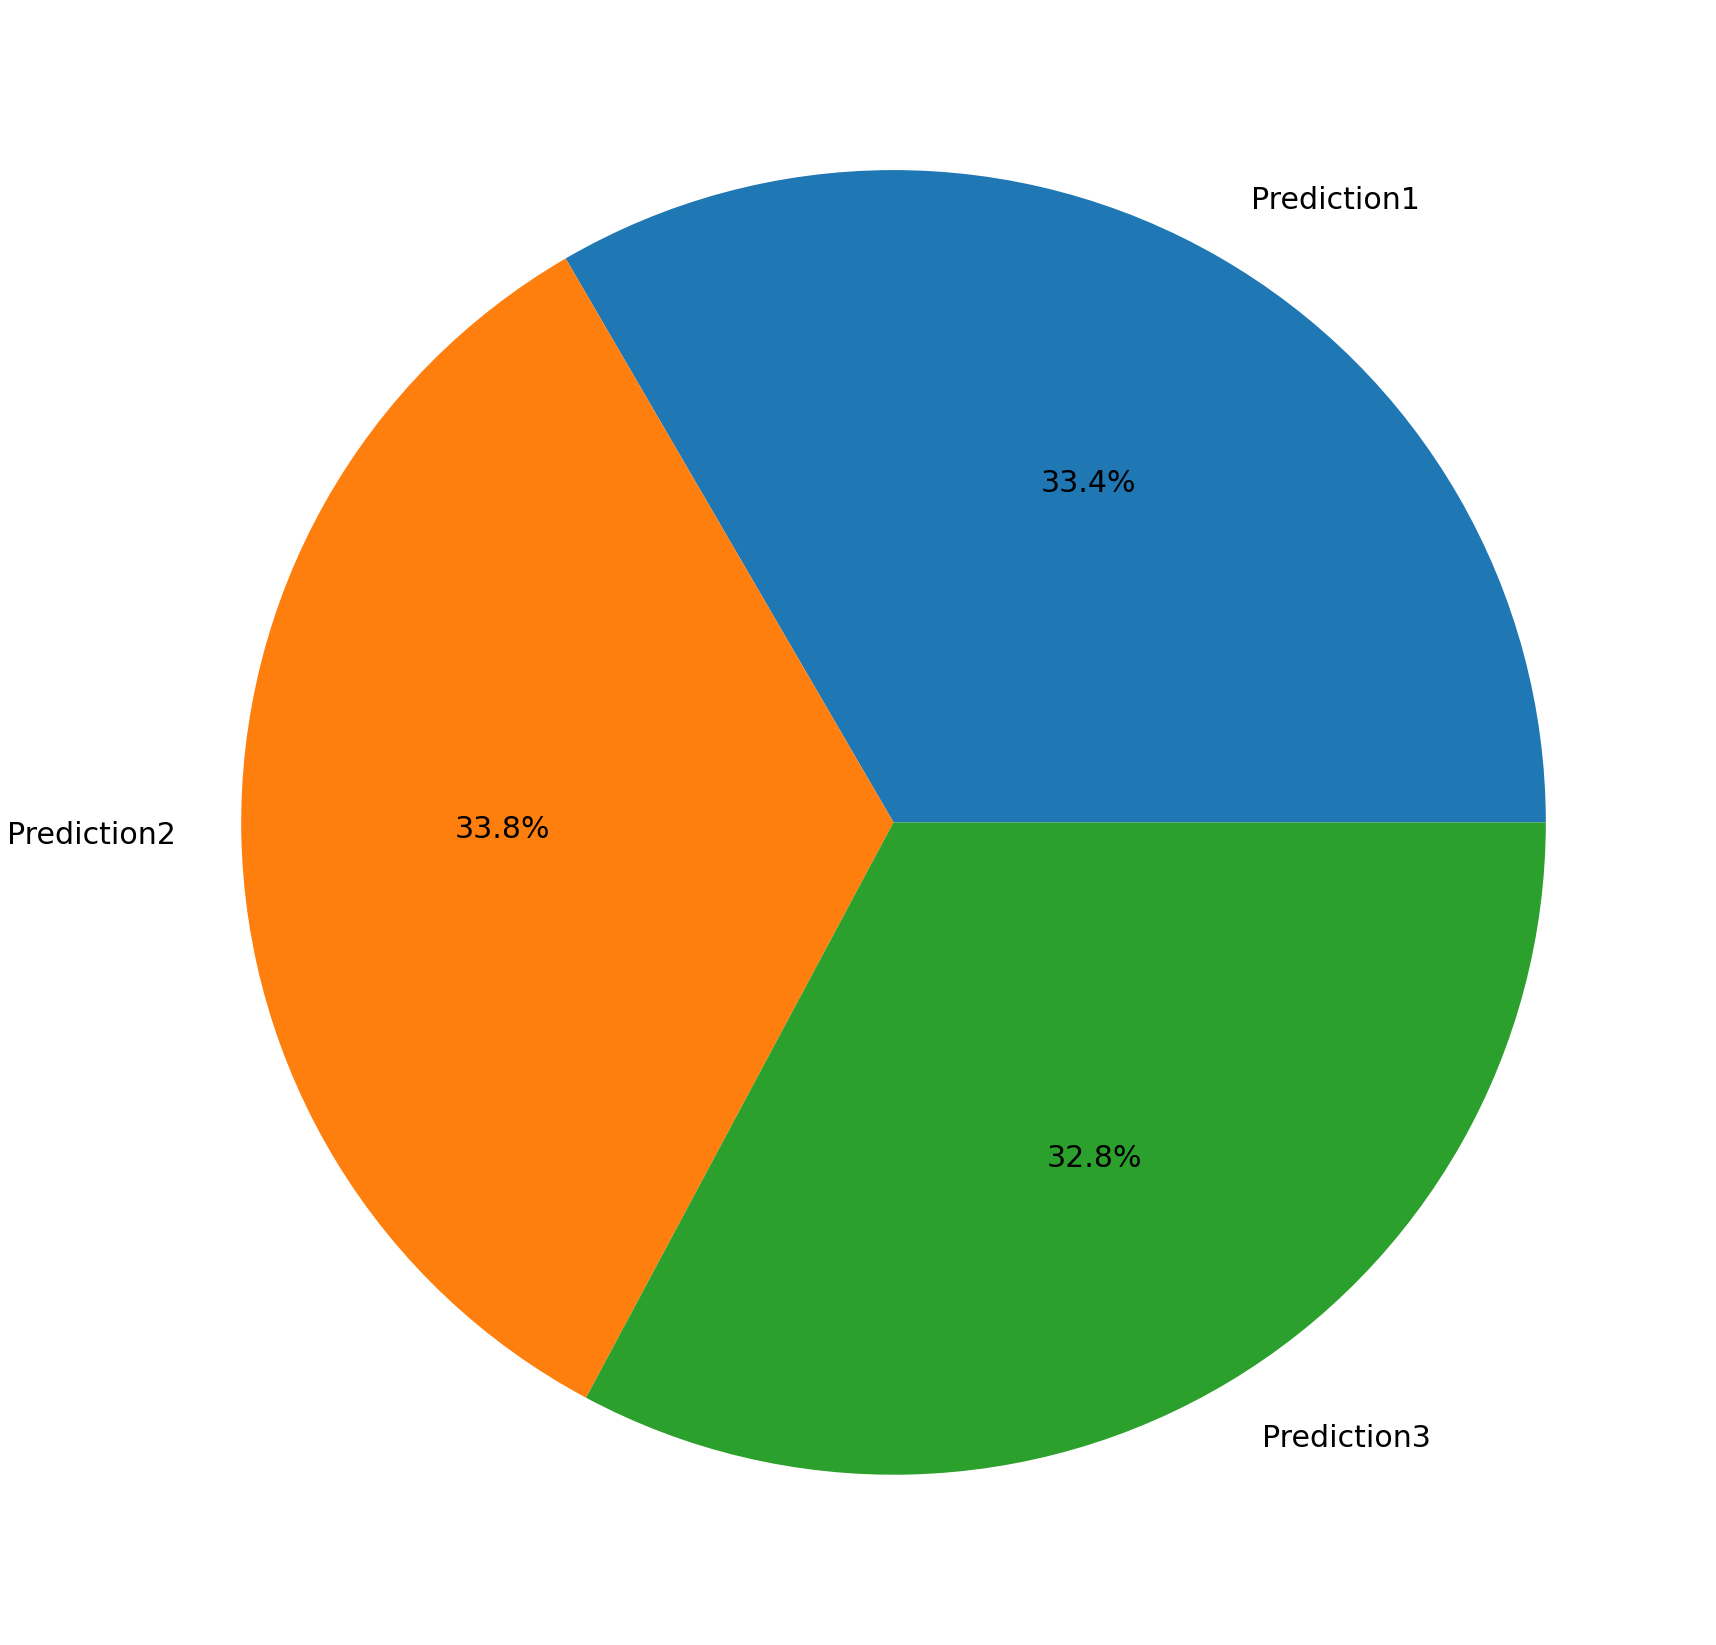

In [62]:
plt.pie([p1_success_ptg,p2_success_ptg,p3_success_ptg],labels=('Prediction1','Prediction2','Prediction3'),autopct ='%1.1f%%');


# Pie Chart Analysis 

> In this analysis, the efficiency of the various prediction methods was analyzed. This was to establish which of these prediction methods performed best, that is comparing their success rate. From the chart, it is clear that prediction method 2 had the best success rate among the three methods of prediction.